
# Project: TMDb Movie Data Anlaysis

#### Intro to Data Analysis

<a id='intro'></a>
## Introduction


- Data: **TMDB movie dataset**. 
- Distcrption: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.   


---
- 분석 문항

1. 매해 가장 인기 있는 영화 장르는 무엇인가?

2. 영화 수익과 가장 연관이 있는 변수는 무엇인가?

3. 상업적으로 가장 성공적인 배우는 누구인가?

---

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### General Properties

- total 21 columns and 10866 rows

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- 'budget' and 'revenue' 50% 이상의 값이 0으로 나타남
- 데이터 정제가 필요

In [5]:
sum(df['revenue'] * df['budget'] * df['revenue_adj'] * df['budget_adj'] ==  0)

7011



### Data Cleaning 


- 필요한 변수만 남기기

(imdb_id', 'homepage','director', 'tagline', 'keywords','overview','production_companies', 'release_date') -> 버림

In [6]:
# drop columns

df = df.drop(['imdb_id', 'homepage', 'director', 'tagline', 'keywords', 
         'overview', 'production_companies', 'release_date'], axis = 1 )

In [7]:
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2. 값이 0인 경우 처리

In [8]:
# replace 0 to NAN

df = df.replace(0, np.NaN)
print(df.isnull().sum())

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
runtime             31
genres              23
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64


In [9]:
# drop missing data

df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3851 non-null   int64  
 1   popularity      3851 non-null   float64
 2   budget          3851 non-null   float64
 3   revenue         3851 non-null   float64
 4   original_title  3851 non-null   object 
 5   cast            3851 non-null   object 
 6   runtime         3851 non-null   float64
 7   genres          3851 non-null   object 
 8   vote_count      3851 non-null   int64  
 9   vote_average    3851 non-null   float64
 10  release_year    3851 non-null   int64  
 11  budget_adj      3851 non-null   float64
 12  revenue_adj     3851 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 421.2+ KB
None


In [11]:
# drop duplicates

df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

#### 장르와 배우 변수 '|'를 기준으로 나눌것 (메인 장르, 메인 배우 하나만 남기기)

columns: Genres, actor

In [12]:
# Leave one value(main actor) in cast column

df['cast'] = df['cast'].str.split('|', expand=True)[0]

df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# Leave one value(main genre) in genres column

df['genres'] = df['genres'].str.split('|', expand=True)[0]

df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,120.0,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,119.0,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,136.0,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,137.0,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### RQ1. 매해 가장 인기있는 영화 장르는 무엇?


#### 1. Select the popular genre according to the number movies of each genres released each year

In [14]:
# Groupby two columns and get maximun count value
# code ref: https://stackoverflow.com/questions/45161355/pandas-dataframe-find-the-max-after-groupby-two-columns-and-get-counts

genres_year = df.groupby(['release_year', 'genres'], as_index = False )['id'].count()
genres_year

,release_year,genres,id
0,1960,Action,2
1,1960,Comedy,2
2,1960,Drama,1
3,1961,Action,1
4,1961,Adventure,1
...,...,...,...
587,2015,Romance,6
588,2015,Science Fiction,5
589,2015,Thriller,9
590,2015,War,1


In [15]:
genres_result1 = genres_year.groupby('release_year').apply(lambda x: x.genres[x.id.idxmax()])
genres_result1

release_year
1960       Action
1961       Comedy
1962    Adventure
1963       Action
1964        Drama
1965        Drama
1966       Action
1967        Crime
1968    Adventure
1969    Adventure
1970       Action
1971       Action
1972       Action
1973        Crime
1974       Action
1975        Drama
1976        Drama
1977        Drama
1978        Drama
1979        Drama
1980       Horror
1981        Drama
1982        Drama
1983       Comedy
1984       Action
1985       Action
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990       Action
1991       Action
1992       Action
1993        Drama
1994       Comedy
1995       Action
1996        Drama
1997        Drama
1998       Comedy
1999       Comedy
2000       Comedy
2001       Action
2002        Drama
2003        Drama
2004       Comedy
2005        Drama
2006        Drama
2007       Comedy
2008        Drama
2009       Comedy
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Dra

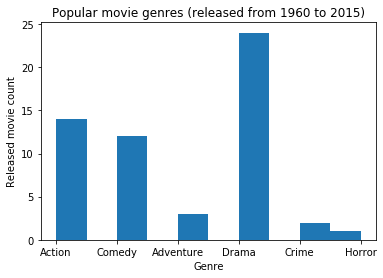

In [16]:
plt.hist(genres_result1)
plt.title("Popular movie genres (released from 1960 to 2015)")
plt.xlabel("Genre")
plt.ylabel("Released movie count");

### RQ2.  영화 수익에 가장 영향을 많이 주는 변수는 무엇?


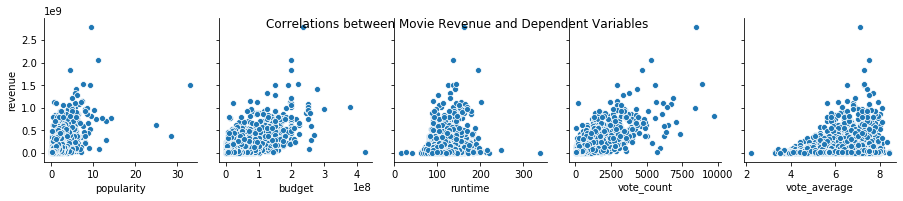

In [20]:
g =sns.pairplot(df, x_vars = ['popularity', 'budget', 'runtime',
                           'vote_count', 'vote_average'], 
             y_vars = 'revenue') ;
g.fig.suptitle("Correlations between Movie Revenue and Dependent Variables") ;

### RQ3.  상업적으로 가장 성공한 배우는?

In [21]:
# find top 10 casts

success_actor = df.groupby(['cast'], as_index = False ).revenue_adj.mean()
success_actor.sort_values(by=['revenue_adj'], ascending = False).head(10)

,cast,revenue_adj
894,Mark Hamill,1.822719e+09
517,Henry Thomas,1.791694e+09
1157,Rod Taylor,1.574815e+09
709,Jonathan Taylor Thomas,1.159592e+09
857,Linda Blair,1.138977e+09
251,Chris Pratt,1.052369e+09
736,Julie Andrews,9.242697e+08
1198,Sam Neill,9.215062e+08
1201,Sam Worthington,8.474021e+08
1408,William Moseley,8.360904e+08


In [22]:
# check out Mark Hamill's movie

temp = df.loc[ df['cast'] == "Mark Hamill" ]
temp

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill,121.0,Adventure,4428,7.9,1977,3.957559e+07,2.789712e+09
7309,1891,5.488441,18000000.0,538400000.0,The Empire Strikes Back,Mark Hamill,124.0,Adventure,3954,8.0,1980,4.762866e+07,1.424626e+09
7987,1892,4.828854,32350000.0,572700000.0,Return of the Jedi,Mark Hamill,135.0,Adventure,3101,7.8,1983,7.082424e+07,1.253819e+09


>May the Force be with you.